# Types of supervised learning

- **Classification** - Predict a categorical response 
- **Regression** - Predict a continous response 

# Reading Data using pandas

In [1]:
# Conventional way to import pandas
import pandas as pd

In [2]:
# Read csv file 
data = pd.read_csv('Advertising.csv')

# Display the first 5 rows 
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Display the last 5 rows 
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
# Check the shape of DataFrame (rows,columns)
data.shape

(200, 5)

# Primary object types

- **DataFrame** - rows and colums (like a spreadsheet)
- **Series** - A single column 

In [5]:
# Making unnamed col the index col
data = pd.read_csv('Advertising.csv',index_col=0)

#display the head()
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

**What are the features?**

- **TV** - Advertising dollars spent on TV for a single product in a given market(in thousand of dollars)
- **Radio** - Advertising dollats spent on Radio
- **Newspaper** - Advertising dollats spent on Newspaper

**What is the response?**

- **Sales**: sales of a single product in a given market(in thousand of item)

**What Elese I know?** 

- Because the response variable is continuous , this is a **regression** problem.
- There are 200 **observations** (represented by rows) , and each observation is a single market.

In [8]:
# import seaborn library , which is use for statistical data visualisation , and this is build
#top of the matplotlib 
import seaborn as sns

# allow plots to appear within notebook
%matplotlib inline

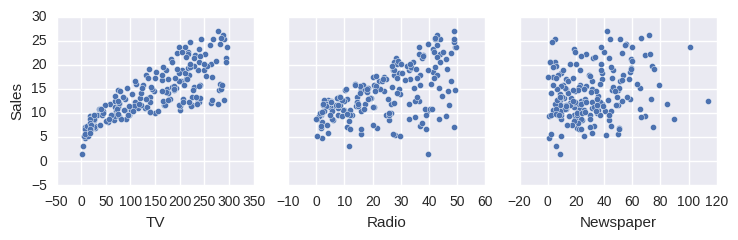

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

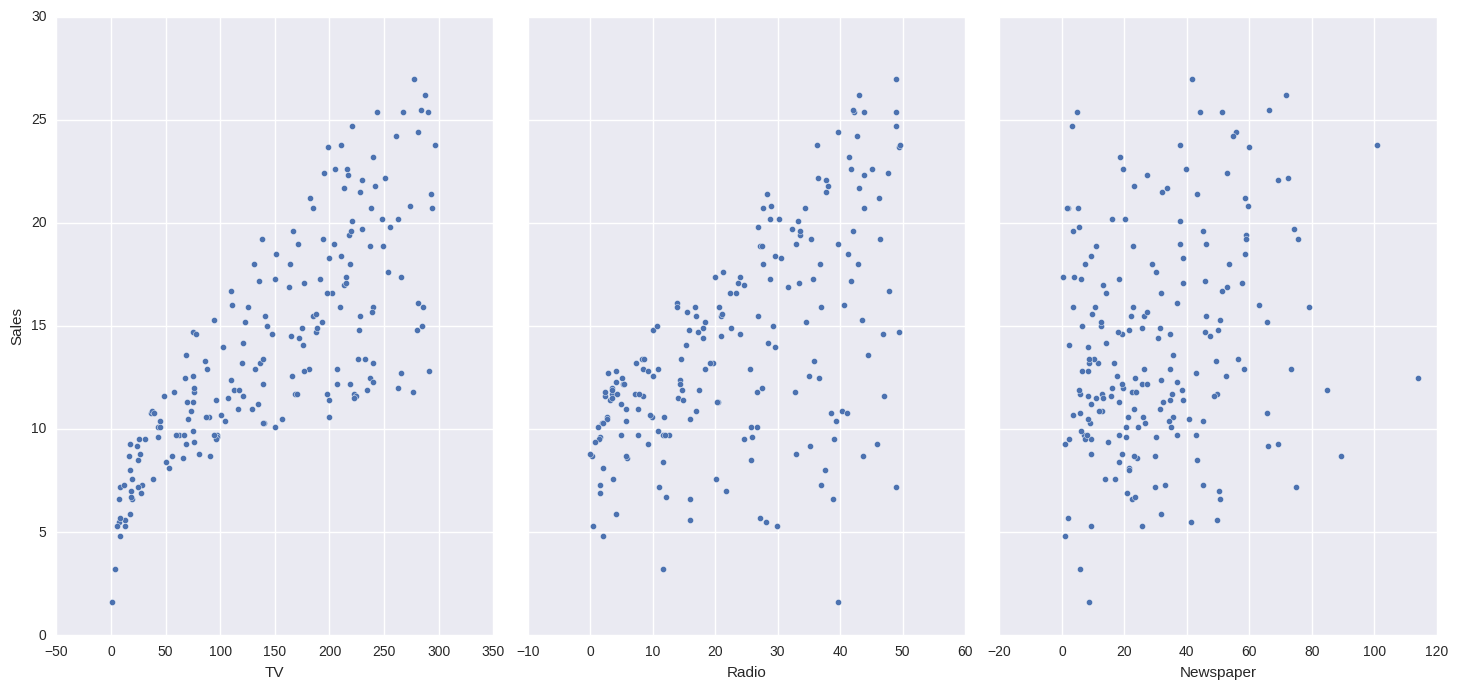

In [10]:
# Change the size and the aspect ration so i can visualize this more easily 
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

**Observation from the plots** 

- TV and advertising in linear relationship , this means TV advertising increases so do the sales increases .
- Less strong relationship in Radio advertising and sales .
- And very week relationship between Newspaper and Sales .

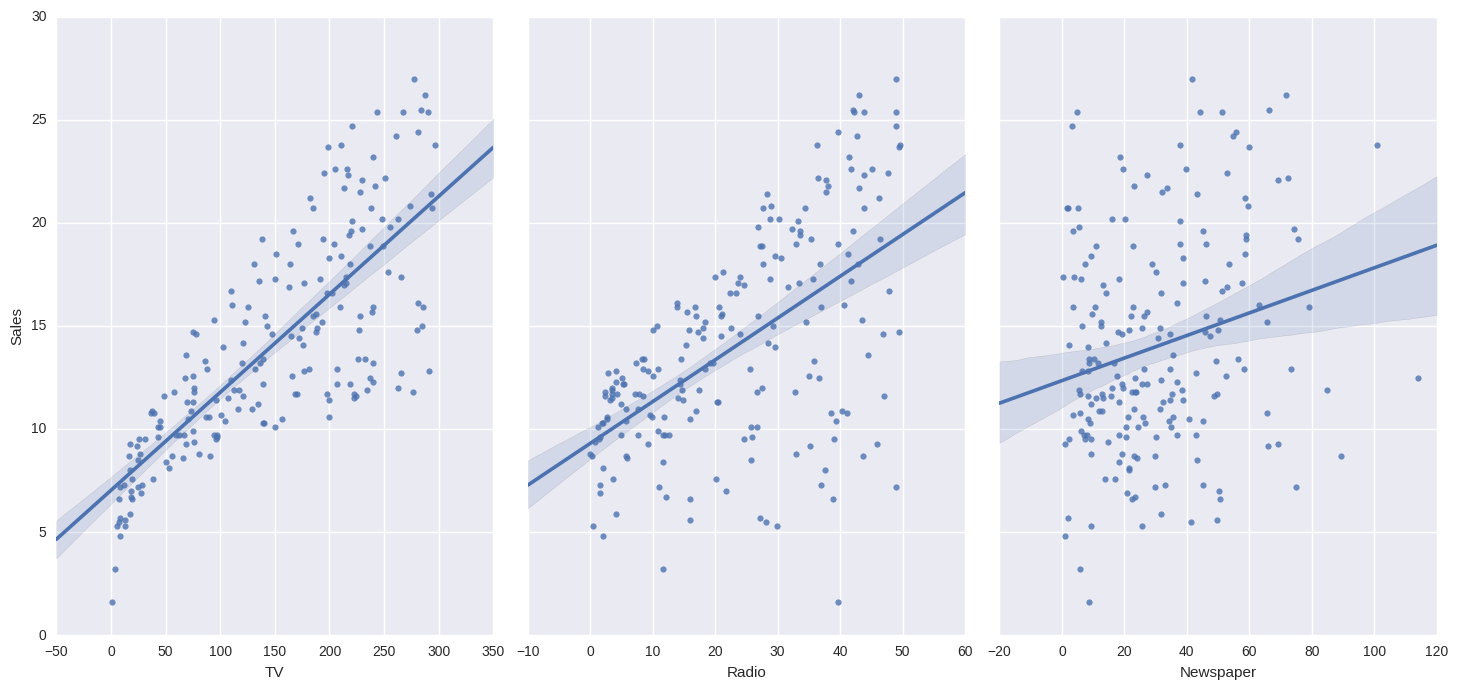

In [11]:
# Add One more argument in seaborn so seaborn will give me a relation , seaborn will put a line 
# of best fit , and 95% confidence band
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

**Difference between Regression and Linear Regression?** 
 Regression as it relates to machine learning is simple a type of supervised learning problem .
 In which the response is continous . Linear Regression is a particular machine learning model
 that can be used for regression problems.

# Linear Regression 

**Pros** - Fast , no tunning required , highly interpretable
**Cons** - unlikely to produce the best predictive accuracy (as compared to other model), because linear regression presumes linear relationship between the features and response .If the relationship between the features and response is highly non-linear , then linear regression will be unable to model the relationship , and thus it's predection is not very accurate .

**Linear Regression Equation**
$$ y = \beta_0 + \beta_1x_1+\beta_2x_2+....+\beta_nx_n $$

**Where**,
- $y=$ is the response variable 
- $\beta_0=$ is itercept
- $\beta_1=$ is the coffecient of $x_1$ (is the first feature)
- $\beta_2=$ is the coffecinet of $x_2$ (is the 2nd feature)
- $\beta_n=$ is the coffecient if $x_n$ (is the nth feature)

**In this case**

$$y = \beta_0 + \beta_1\ x\ TV + \beta_2\ x\ Radio +\ \beta_3\ x\ Newspaper$$

**$\beta$** 
values are called the **model coefficients**. These values are "learned" during the model fitting step using "least squares" criterion. Then the fit model can be used in prediction.

# Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to NumPy arrays.
- However , pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y cane a pandas Series .

In [24]:
# Create a python list of feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original Dataframe
x = data[feature_cols]

# Equivalent command to this in one line 
#x = data[['TV','Radio','Newspaper']]

#print the frist 5 rows
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [25]:
# Check the type and shape of X
print type(x)
print x.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [26]:
# Select a series from the DataFrame 
y = data['Sales']

#equivalent command that works if there are no spaces in the column name
#y = data.Sales

# print the first 5 values 
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [27]:
# Check the type and the shape 
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


# Splitting the X and y into training and testing sets

In [28]:
from sklearn.cross_validation import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,random_state=1)

In [29]:
# Default split is 75% for training and 25% for testing
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


# Linear Regression in scikit-learn

In [30]:
# import module
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

# fit the model to the training data(learn the coefficient)
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Interpreting the model coefficients

In [32]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [33]:
# pair the features with the coefficients 
zip(feature_cols, linreg.coef_)

[('TV', 0.04656456787415026),
 ('Radio', 0.17915812245088847),
 ('Newspaper', 0.0034504647111804343)]

$$y = 2.88 + 0.0466 x\ TV +\ 0.179 x\ Radio +\ 0.00345 x\ Newspaper $$

** How do i interpret the TV coefficient (0.0466) ? **

- For a given amount of Radio and Newspaper ad spending a **"Unit" increase in TV ad spending ** is associated with a **0.0466 "unit" increase in Sales**
- Or more clearly :- For a given amount of Radio and Newspaper ad spending , **and additional $1000 spend TV adds** with and **increase in sales of 46.6 items**

***Important Notes***
- This is a statement of **assosication** , not **causation**
- If an increase in TV ad spending was associated with a **decrease** in sales $\beta_1$ would be **negative**.

# Making Prediction

In [5]:
import pandas as pd 

data = pd.read_csv('Advertising.csv')

# Select a series from the DataFrame 
y = data['Sales']

#equivalent command that works if there are no spaces in the column name
#y = data.Sales

# print the first 5 values 
y.head()

# Create a python list of feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original Dataframe
x = data[feature_cols]

# Equivalent command to this in one line 
#x = data[['TV','Radio','Newspaper']]

#print the frist 5 rows
print x.head()

# Check the type and shape of X
print type(x)
print x.shape

from sklearn.cross_validation import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,random_state=1)

# printing the traing and testing data shapes
print "X training Data Shape ",x_train.shape
print "X Test Data Shape",x_test.shape
print "Y training Data Shape",y_train.shape
print "Y Testing Data Shape",y_test.shape
# import module
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

# fit the model to the training data(learn the coefficient)
linreg.fit(x_train,y_train)

# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

# pair the features with the coefficients 
zip(feature_cols, linreg.coef_)

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
(200, 3)
X training Data Shape  (150, 3)
X Test Data Shape (50, 3)
Y training Data Shape (150,)
Y Testing Data Shape (50,)
2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.04656456787415026),
 ('Radio', 0.17915812245088847),
 ('Newspaper', 0.0034504647111804343)]

In [6]:
# Make predictions on the testing set
y_pred = linreg.predict(x_test)

In [7]:
print y_pred

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


# Model evaluation metrics for regression

Evaluation metrics for classification problems , such as **accuracy** , are note useful for regression problems. Instead , we need evaluation metrics designed for comparing continous values.

Lets create some example numric predictions , and calculate **three common evaluation matrics** for regression problems.

In [13]:
# define true and predict response values
true = [100,50,30,20]
pred = [90,50,50,30]

**Mean Absolute Error(MAE)** is the mean of the absolute values of the Errors

$$ \frac{1}{n}=\sum_{i=1}^{n}|y_i -\hat{y_i}| $$

**Where**
**Errors** are the difference between true and predicted values 

In [14]:
# Calculate MAE by hand
print (10+0+20+10)/4

# Calculate the MAE using scikit-learn
from sklearn import metrics
print metrics.mean_absolute_error(true,pred)

10
10.0


**Mean Squared Error(MSE)** is the mean of the square erros:

$$ \frac{1}{n}=\sum_{i=1}^{n}(|y_i -\hat{y_i}|)^2 $$

In [15]:
# Calculate MSE by hand 
print (10**2 + 0**2 + 20**2 + 10**2)/4

# calculate MSE using scikit learn
print metrics.mean_squared_error(true,pred)

150
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$ \sqrt(\frac{1}{n}=\sum_{i=1}^{n}(|y_i -\hat{y_i}|)^2) $$

In [17]:
# calculate RSME by hand
import numpy as np
print np.sqrt((10**2+0**2+20**2+10**2)/4)

# calculate RSME using scikit-learn
print np.sqrt(metrics.mean_squared_error(true,pred))

12.2474487139
12.2474487139


Comaparing these metrices:

- **MAE** is the easiest to understand , because it is the average error.
- **MSE** is more popular than MAE , because MSE "punishes" large errors.
- **RSME** is even more popular than MSE , because RSME is interpreted in the "y" units

# Computing the RSME for our sales predictions

In [18]:
print np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

1.03290450104


# Feature Selection

Does **Newspaper** "belongs" in our model? In other words, does it improve the quality of our predictions?

Let's ***remove it*** and check the **RSME**

In [20]:
# create a python list of feature names
feature_cols = ['TV','Radio']

#use this list to select a subset of the original DataFrame
x = data[feature_cols]

# select into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

#fit the model to the training data(learn the co-efficients)
linreg.fit(x_train,y_train)

#make a prediction on the testing set
y_pred = linreg.predict(x_test)

#compute the RMSE of our prediction
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.38790346994


The **RMSE decreased** when we removed Newspaper from the Model . (Error is something we want to minimize,so a ***lower number of RMSE is better***). Thus it is unlikely that this feature is useful for predicting Sales , ad should be removed from the model.